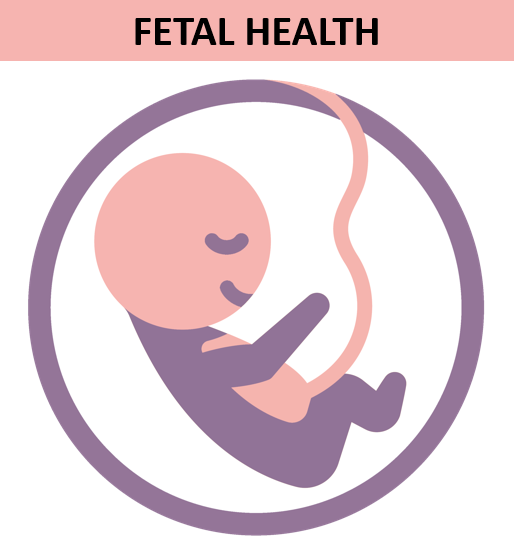

# <font color='pink'> Fetal Health Prediction </font> 

### our data :

#### This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:
- Normal
- Suspect
- Pathological

####  In this notebook we will try to build a model to predict whether a fetus is normal, suspicious or problematic with given CTG values.

### main columns :
1. Baseline value: The baseline FHR is the heart rate during a 10 min segment rounded to the nearest 5 beat per min increment excluding periods of marked FHR variability, periodic or episodic changes and segments of baseline that differ by more than 25 beats per min (bpm). The minimum baseline duration must be at least 2 min.
2. Accelerations: Accelerations are short-term rises in the heart rate of at least 15 beats per minute above the baseline, lasting at least 15 seconds. Accelerations are normal and healthy. They tell the doctor that the baby has an adequate oxygen supply, which is critical.
3. fetal_movement: It's often called kick counting. It's done by counting the number of kicks you feel from your baby in the uterus in a certain time period.
4. Uterine_contractions: Contractions are used to gauge the activity of labour. Too few contractions indicate labour is not progressing. Too many contractions can mean uterine hyperstimulation, which can lead to fetal compromise.
5. Decelerations: Decelerations are transient episodes of decrease of FHR below the baseline of more than 15 bpm lasting at least 15 seconds 
 - light_decelerations.
 - Severe_decelerations.
 - prolongued_decelerations.
6. Short term variability (STV):It is the beat-to-beat variation in fetal heart rate. It is the oscillation of the FHR around the baseline in amplitude of 5 to 10 bpm.Low fetal heart rate short term variation (STV) is predictive for hypoxia during the antenatal period.
 - abnormal_short_term_variability
 - mean_value_of_short_term_variability
7. Long term variability: Long-term variability is a somewhat slower oscillation in heart rate and has a frequency of three to 10 cycles per minute and an amplitude of 10 to 25 bpm.

 - percentage_of_time_with_abnormal_long_term_variability
 - mean_value_of_long_term_variability
 
### The column we want to predict: "fetal_health".


# <font color='pink'> imports </font>

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn is a library for making statistical graphics in Python. 
                      #It builds on top of matplotlib and integrates closely with pandas data structures.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

fh = pd.read_csv(r"C:\\Users\\abiis\\OneDrive\\שולחן העבודה\\מדעי הנתונים\\fetal_health.csv")

In [386]:
fh.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [387]:
fh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

### As we can see there are no null values in the table

# Analyze our data

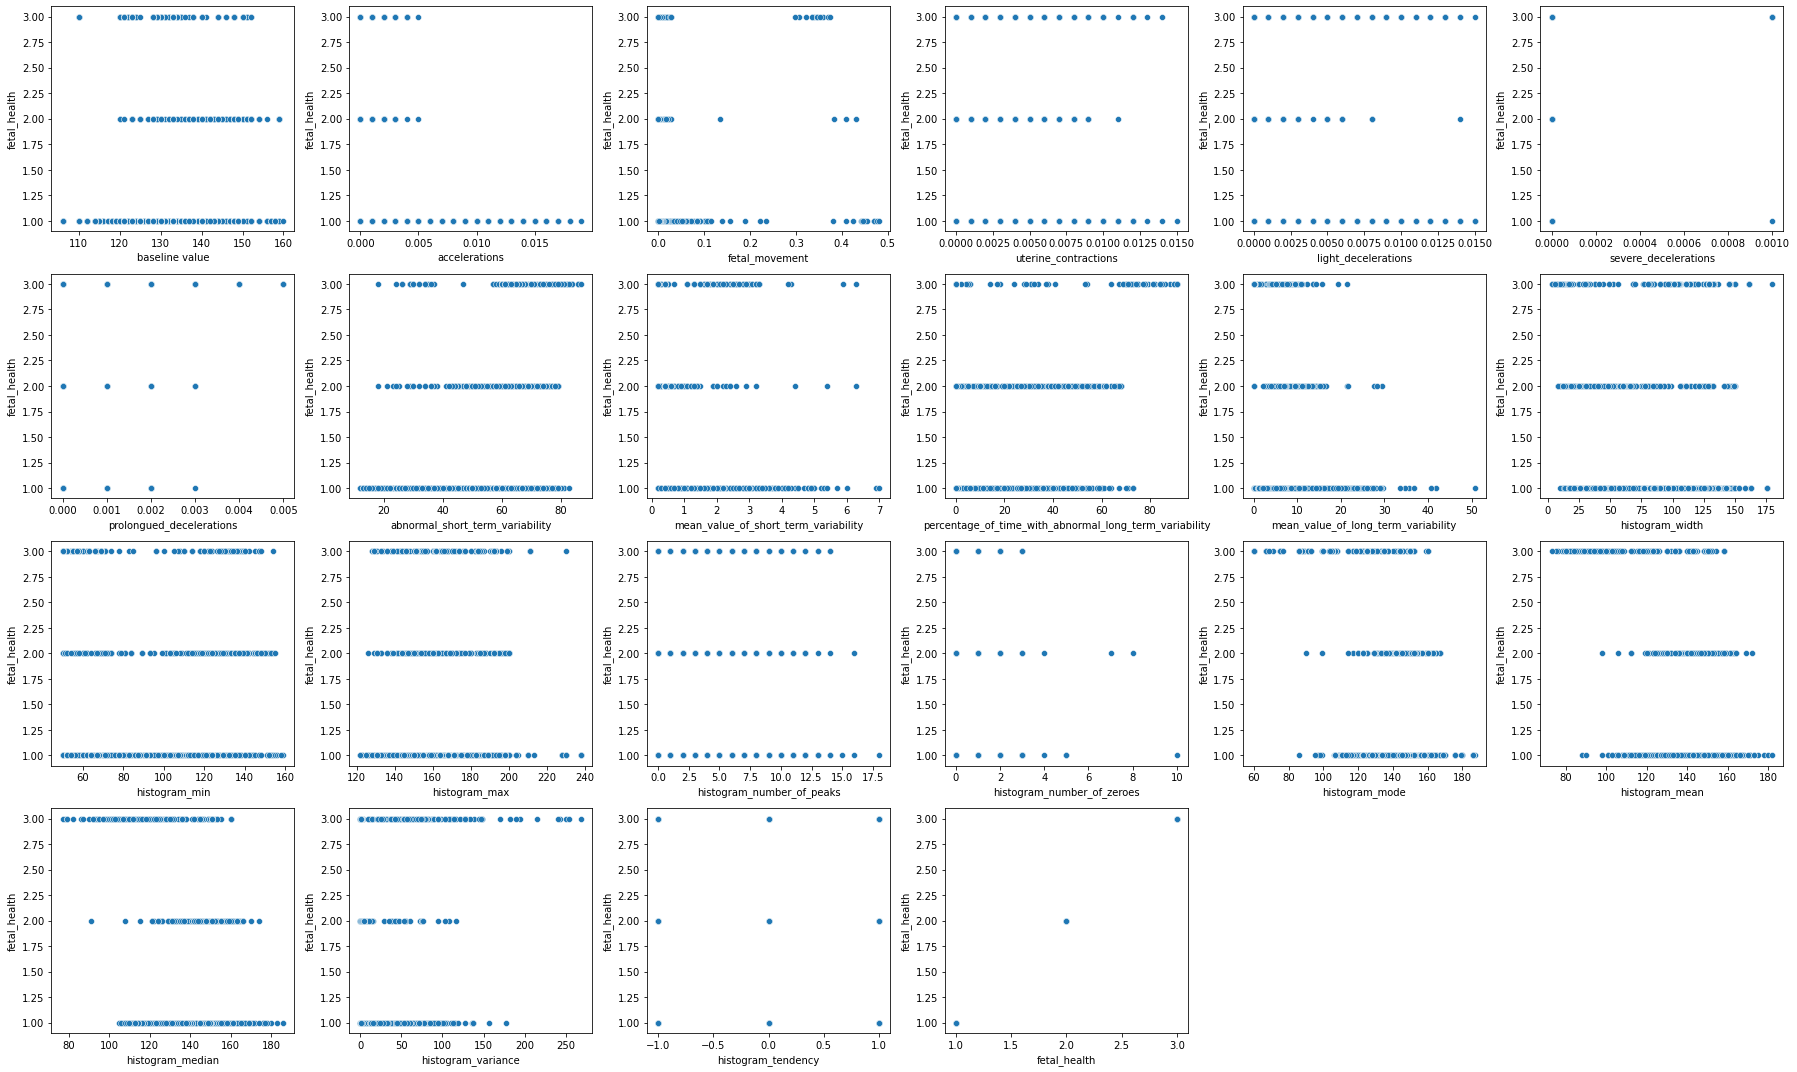

In [388]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(fh.columns):
    plt.subplot(4, 6, i + 1)
    sns.scatterplot(data = fh, x = fh[column], y = "fetal_health")
    
    
plt.tight_layout()
plt.show()

### we can seen from the graphs that our data is relatively gathered togrther - this will help us later on with our classifing problem, look for example at the graphs below:

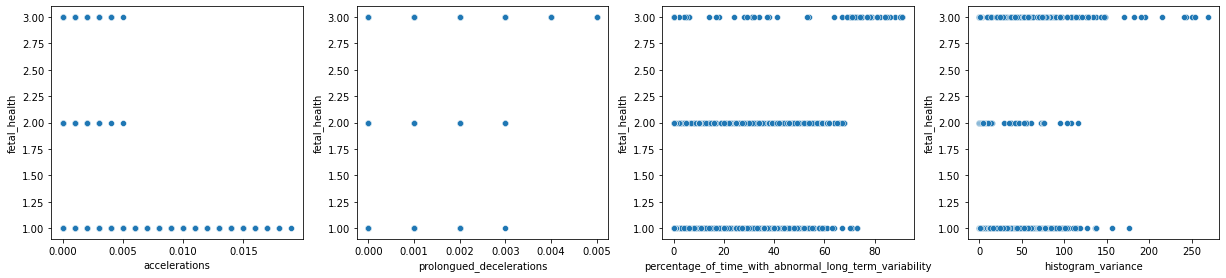

In [389]:
plt.figure(figsize=(25, 15))
plt.subplot(4, 6, 3)
sns.scatterplot(data = fh, x = fh['accelerations'], y = "fetal_health")
plt.subplot(4, 6, 4)
sns.scatterplot(data = fh, x = fh['prolongued_decelerations'], y = "fetal_health")
plt.subplot(4, 6, 5)
sns.scatterplot(data = fh, x = fh['percentage_of_time_with_abnormal_long_term_variability'], y = "fetal_health")
plt.subplot(4, 6, 6)
sns.scatterplot(data = fh, x = fh['histogram_variance'], y = "fetal_health")
plt.tight_layout()
plt.show()

## Correlation of features

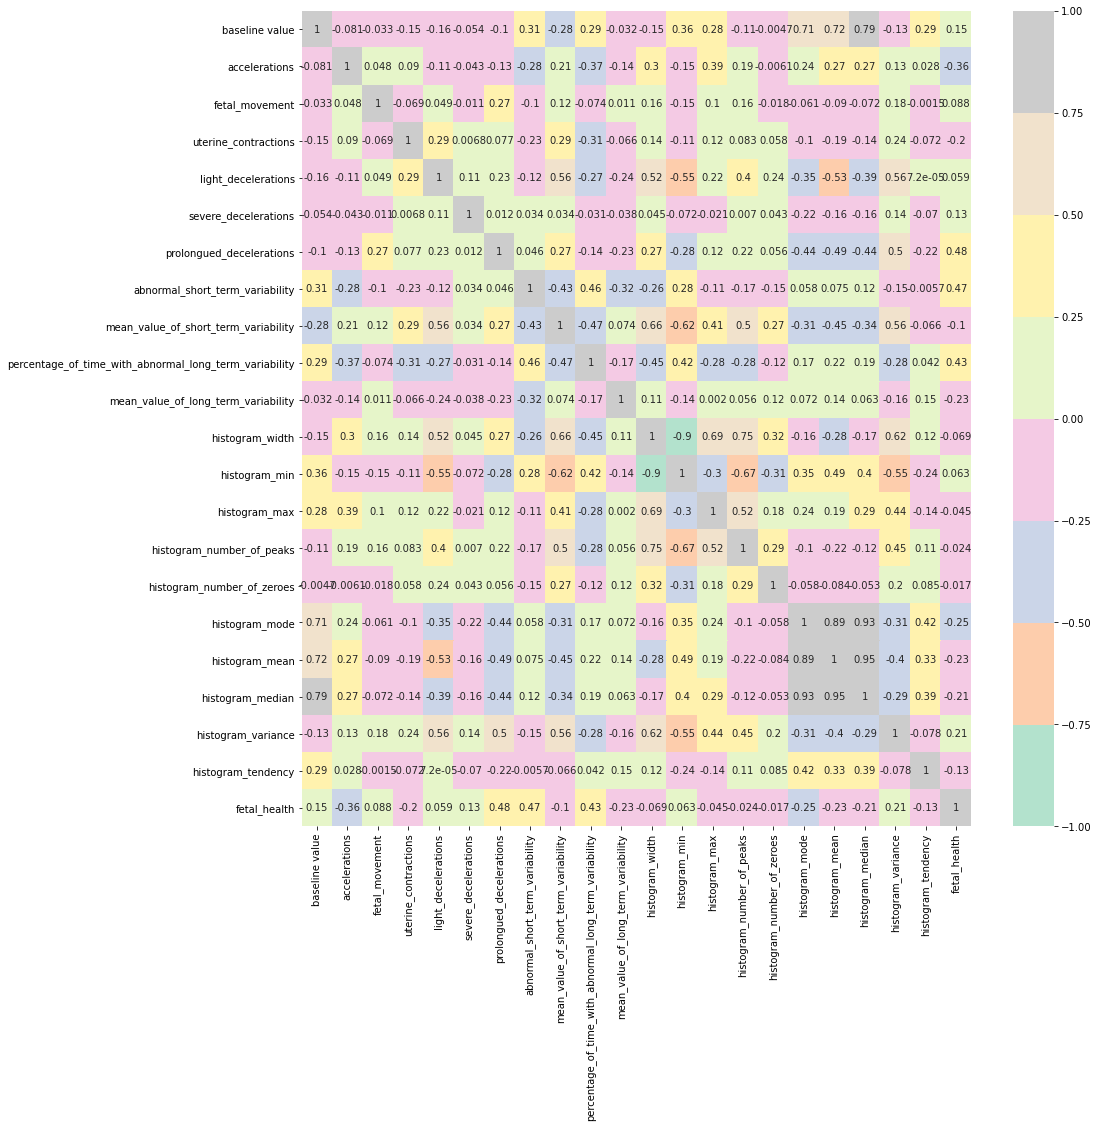

In [390]:
corr = fh.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='Pastel2', annot=True)
plt.show()

In [391]:
corr[abs(corr['fetal_health']) > 0.3]['fetal_health']

accelerations                                            -0.364066
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
fetal_health                                              1.000000
Name: fetal_health, dtype: float64

### As we see, we have columns in our data with a nice covariance with the column we want to predict

### Looking for outliers in the data

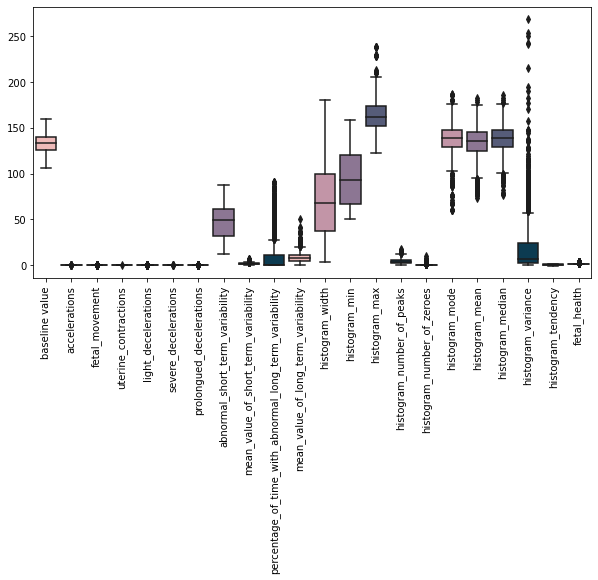

In [392]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(10,5))
sns.boxplot(data = fh,palette = shades)
plt.xticks(rotation=90)
plt.show()

### Removing outliers

In [393]:
fh_no_out = fh

In [394]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 4 * att.std()
    upperbound = att.mean() + 4 * att.std()
    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************\n')
    
    df = df1.copy()
    return df


In [395]:
#fh_no_out = removeOutlier(fh['accelerations'],fh)
for colomn in fh:
    fh_no_out = removeOutlier(fh_no_out[colomn],fh_no_out)

lowerbound:  93.94047997758267  -------- upperbound:  172.66723403935052
0  number of outliers from  2126
 ******************************************************

lowerbound:  -0.012284094767323131  -------- upperbound:  0.018640632867040863
1  number of outliers from  2126
 ******************************************************

lowerbound:  -0.17714699718562218  -------- upperbound:  0.19603735012679877
29  number of outliers from  2125
 ******************************************************

lowerbound:  -0.007452591578791132  -------- upperbound:  0.016207362571157465
0  number of outliers from  2096
 ******************************************************

lowerbound:  -0.010018886748584267  -------- upperbound:  0.01376984094705752
10  number of outliers from  2096
 ******************************************************

lowerbound:  -0.00022802443252453955  -------- upperbound:  0.00023473584192051268
7  number of outliers from  2086
 *********************************************

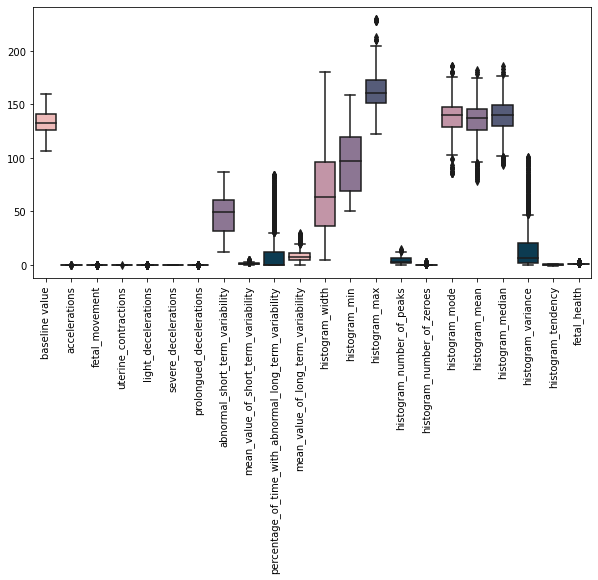

In [396]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(10,5))
sns.boxplot(data = fh_no_out,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [397]:
fh.shape

(2126, 22)

In [398]:
fh_no_out.shape

(1985, 22)

In [399]:
fh = fh_no_out

### let's check if our data is balanced 

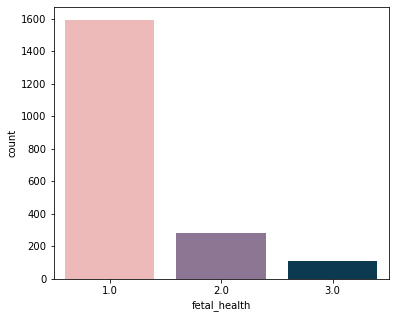

In [400]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
plt.figure(figsize=(6,5))
ax = sns.countplot(x = fh['fetal_health'], palette=colours)

### We want to pradict the fetal helth colomn but as we can see we have imblance data, so we have to take this in our consideration going forword.

## train test split:

In [401]:
X = fh.drop("fetal_health", axis=1)
y = fh["fetal_health"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [402]:
X_train.shape, X_test.shape

((1389, 21), (596, 21))

In [403]:
df_train_x = pd.DataFrame(X_train)

df_train_y = pd.DataFrame(y_train)

df_train = pd.concat([df_train_x, df_train_y], axis=1, join="inner")

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 1825 to 1138
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1389 non-null   float64
 1   accelerations                                           1389 non-null   float64
 2   fetal_movement                                          1389 non-null   float64
 3   uterine_contractions                                    1389 non-null   float64
 4   light_decelerations                                     1389 non-null   float64
 5   severe_decelerations                                    1389 non-null   float64
 6   prolongued_decelerations                                1389 non-null   float64
 7   abnormal_short_term_variability                         1389 non-null   float64
 8   mean_value_of_short_term_variabilit

## Creating synthetic data using "SMOTE"

In [404]:
! pip install imblearn --user

In [405]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

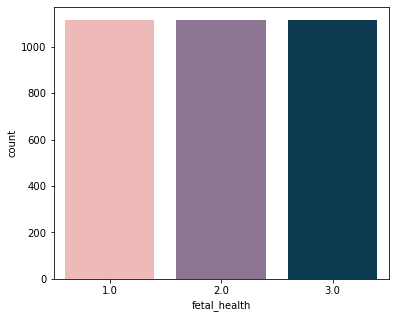

In [406]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
plt.figure(figsize=(6,5))
ax = sns.countplot(x = y_res, palette=colours)

### To balance the data we duplicate the minority class to meet the value_count of the majority class.

## dummy model

In [407]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.7986577181208053

In [408]:
scaler = StandardScaler() 

X_train_scaled_upsampled = scaler.fit_transform(X_res)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)


## knn model
### 1. fined optymal k

In [409]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [410]:
# search for an optimal value of K for KNN
kf = KFold(n_splits=10, random_state=2, shuffle=True)

k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled_upsampled, y_res, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9811690052730361, 0.9784761819644293, 0.9701072481901868, 0.9704066493877915, 0.9608436857628029, 0.9602448833675933, 0.9524684958441327, 0.9539646080972384, 0.9452918044508, 0.94768612029672, 0.9414067387612836, 0.9426043435517026, 0.938122262936813, 0.9372267405487534, 0.9315470551434446, 0.9342354097774601, 0.9267619983912774, 0.9291527392975245, 0.9234730538922158]


Text(0, 0.5, 'Cross-Validated Accuracy')

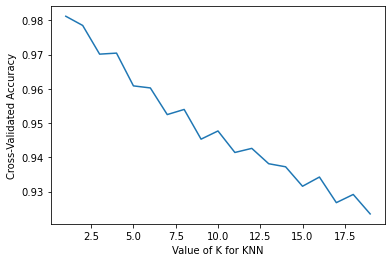

In [411]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [412]:
op_k = k_scores.index(max(k_scores))+1
score_knn = k_scores[op_k]
print ("our optimal k =" + str(op_k))
print ("Accuracy best score =" + str(score_knn))

our optimal k =1
Accuracy best score =0.9784761819644293


### We asume that this hige score is because that the relation between our classes is very clear (as we saw above in the graphes).
### In order to prevent "over fitting" we will choose k=3 to our final model.

In [413]:
print ("k = 3 score:" + str(k_scores[2]))

k = 3 score:0.9701072481901868


## logistic regression

In [414]:
logistic_regression = LogisticRegression()

scores_Logistic = cross_val_score(logistic_regression, X_train_scaled_upsampled, y_res, cv =kf, n_jobs = 2, scoring = "accuracy")
print("accuracy score:" + str(scores_Logistic.mean()))

accuracy score:0.9010546072035034


### We got a much higher score in KNN model, we assume that logistic regression model is not the most suitable for our data, therefore we will continue testing other models


## Baseline model of gradient boosting classifier with default parameters:

In [416]:
gbc = GradientBoostingClassifier()

scores = cross_val_score(gbc, X_train_scaled_upsampled, y_res, cv =kf, n_jobs = 2, scoring = "accuracy")

print("accuracy score:" + str(scores.mean()))

accuracy score:0.979066940745375


## In this model we got the best score, lets see if we can make it better, by changing the hyperparameter

In [417]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(gbc.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


#### Number of trees:
A high number of trees can be computationally expensive. Generally, with a change in learning rate,n_estimators should also be adjusted (10-fold decrease in learning_rate should go in line with a approx. 10-fold increase in n_estimators.
#### Learning rate:
Determines the contribution of each tree on the final outcome and controls how quickly the algorithm proceeds down the gradient descent (learns). This hyperparameter is also called shrinkage. Generally, the smaller this value, the more accurate the model can be but also will require more trees in the sequence.
#### Tree depth:
Controls the depth of the individual trees. Typical values range from a depth of 3–8 but it is not uncommon to see a tree depth of 1.

In [418]:
params_GBC = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
              "n_estimators": [250, 500],
              "max_depth": [3, 5, 8]
              }

In [420]:
rf_random = RandomizedSearchCV(estimator = gbc, param_distributions = params_GBC, n_iter = 50,random_state=42, cv = kf, verbose=2, n_jobs = -1, scoring='accuracy')

rf_random.fit(X_train_scaled_upsampled, y_res)

C:\Users\abiis\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 42 is smaller than n_iter=50. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 42 candidates, totalling 420 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=2, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.075, 0.1,
                                                          0.25, 0.5, 0.75, 1],
                                        'loss': ['deviance'],
                                        'max_depth': [3, 5, 8],
                                        'n_estimators': [250, 500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [422]:
print("best accuracy score is:")
print(rf_random.best_score_)

best accuracy score is:
0.987145410671195


In [356]:
rf_random.best_params_

{'n_estimators': 250,
 'max_depth': 8,
 'loss': 'deviance',
 'learning_rate': 0.25}

## Lets have a look at all the models best scores

In [424]:
data  = {
         'dummy':[0.798],
          'KNN': [0.97],
         'LogisticRegression':[0.901]
        ,'GradientBoostingClassifier':[0.987],
         }

data = pd.DataFrame(data) 
data

dummy   KNN  LogisticRegression  GradientBoostingClassifier
0  0.798  0.97               0.901                       0.987

# Testing our best model - Gradient Boosting Classifier selecting best featurs with Random Search:


In [370]:
gbc = GradientBoostingClassifier( learning_rate=0.25, loss="deviance", max_depth=8,  n_estimators=250)
gbc.fit(X_train_scaled_upsampled,y_res)

accuracy_score = gbc.score(X_test_scaled, y_test)
predict_gbc = gbc.predict(X_test_scaled)

print("accuracy score:" + str(scores.mean()))

accuracy score:0.9793663419429798


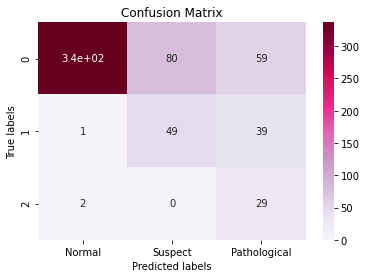

In [377]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,predict_gbc), annot=True, ax = ax, cmap = "PuRd");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

# <font color='pink'> Summary and Conclusions </font>

- Our data set was very clear, it was possible to see a difference between the classes using graphs already at the stage of analysis the data. we saw strong covariance between some features and the column we are predicting - indeed, we got a model with a very high score.

- We have seen that not all models give a good score to this data set, which means that in every data set we need to find out which models will be most suitable for it.

- In addition, with the help of adjusting the best hyperparameters to our best scoring model, we were able to improve its score from 97 percent to 98 percent accuracy - an improvement that is very difficult to perform when it comes to high accuracy percentages!

- Ideas we had to improve the model (but we were short of time)-
1. We saw that there are a lot of features, We could try the models with using "Feature Selection".

2. We could create new features according to the graphs from the top of the notebook were we saw that our data is relatively gathered togrther.